In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from tqdm import tqdm
import os
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap

In [15]:
def getNeighborsTemperature(grid, point, T_inf,B):
    neighbors = []
    
    rows = len(grid)
    cols = len(grid[0])

    for i in range(-1, 2):
        for j in range(-1, 2):
            try:
                if abs(i) != abs(j):
                    neighbor_temp = grid[point[0] + i][point[1] + j]
                    neighbors.append(neighbor_temp)
            except IndexError:
                ###...Edge or corner point...###
                # Upper edge point:
                if point[0] == 0:
                    # upper left corner point
                    if point[1] == 0:
                        if i==-1 and j==0:
                            boundary_temp = grid[point[0] + 1][point[1]] + B*(T_inf - grid[point[0]][point[1]]) # i!=0
                            neighbors.append(boundary_temp)
                        elif i==0 and j==1:
                            boundary_temp = grid[point[0]][point[1]-1] + B*(T_inf-grid[point[0]][point[1]]) # j!=0
                            neighbors.append(boundary_temp)
                    # upper right corner point
                    elif point[1] == cols - 1:
                        if i==1 and j==0:
                            boundary_temp = grid[point[0]-1][point[1]] + B*(T_inf-grid[point[0]][point[1]]) # i!=0
                            neighbors.append(boundary_temp)
                        elif i==0 and j==1:
                            boundary_temp = grid[point[0]][point[1]-1] + B*(T_inf-grid[point[0]][point[1]]) # j!=0
                            neighbors.append(boundary_temp)
                    # upper edge
                    else:
                        boundary_temp = grid[point[0]][point[1]-1] + B*(T_inf-grid[point[0]][point[1]])
                        neighbors.append(boundary_temp)
                
                # lower edge point
                elif point[0] == rows - 1:
                    # Lower left corner
                    if point[1] == 0:
                        if i==-1 and j==0:
                            boundary_temp = grid[point[0]+1][point[1]] + B*(T_inf-grid[point[0]][point[1]]) # i!=0
                            neighbors.append(boundary_temp)
                        elif i==0 and j==-1:
                            boundary_temp = grid[point[0]][point[1]+1] + B*(T_inf-grid[point[0]][point[1]]) # j!=0
                            neighbors.append(boundary_temp)
                    
                    # lower right corner
                    elif point[1] == cols - 1:
                        if i==1 and j==0:
                            boundary_temp = grid[point[0]-1][point[1]] + B*(T_inf-grid[point[0]][point[1]]) # i!=0
                            neighbors.append(boundary_temp)
                        elif i==0 and j==-1:
                            boundary_temp = grid[point[0]][point[1]+1] + B*(T_inf-grid[point[0]][point[1]]) # j!=0
                            neighbors.append(boundary_temp)
                    
                    # lower edge
                    else:
                        boundary_temp = grid[point[0]][point[1]+1] + B*(T_inf-grid[point[0]][point[1]]) # j!=0
                        neighbors.append(boundary_temp)
                
                # left edge
                elif point[1] == 0:
                    boundary_temp = grid[point[0]+1][point[1]] + B*(T_inf-grid[point[0]][point[1]]) # i!=0
                    neighbors.append(boundary_temp)
                
                # right edge
                elif point[1] == cols - 1:
                    boundary_temp = grid[point[0]-1][point[1]] + B*(T_inf-grid[point[0]][point[1]]) # i!=0
                    neighbors.append(boundary_temp)

    return neighbors

def calculateHeat(cellTemp, neighborTemps, gamma):
    cellTemp = cellTemp + gamma*((neighborTemps[0] -2*cellTemp + neighborTemps[-1]) + (neighborTemps[1] -2*cellTemp + neighborTemps[-2]))
    #print(cellTemp)
    return np.float64(cellTemp)

def heatTransfer(grid, boundaryTemp, B_i):
    for i in range(0,len(grid)):
        for j in range(0,len(grid)):
            neighbors = getNeighborsTemperature(grid[:,:,0], (i,j), boundaryTemp, B_i)
            grid[:,:,0][i][j] = calculateHeat(grid[:,:,0][i][j], neighbors, grid[:,:,1][i][j])
    return grid

def calculateAverageTemperatureWithinCircle(grid, center, radius):
    # Extract the temperature values from the grid
    temperatures = grid[:, :, 0]

    # Create a mask for the circle
    x, y = np.indices(temperatures.shape)
    mask = ((x - center[0])**2 + (y - center[1])**2) <= radius**2

    # Calculate the average temperature within the circle
    average_temperature = np.mean(temperatures[mask])
    
    return average_temperature

def makeGif(frames,name,time_step_array,minTemp,maxTemp, frames_name):
        images = []
        for i in tqdm(range(0,len(frames))):
                plt.figure()
                plt.title(f"Temperature at t = {time_step_array[i]} unit time")
                plt.xlabel("x")
                plt.ylabel("y")
                plt.pcolormesh(frames[i], cmap = "inferno" , vmin = minTemp, vmax = maxTemp)
                plt.colorbar()
                images.append(frames[i])
                plt.close()
                
        imageio.mimsave(name+ ".gif", images)

def calc_fluence(E, Reprate):
    # E in [mw], Reprate in [Hz]
    FWHM = 25*10**(-4) # In [cm]
    fluence = E/(Reprate * (10**3) * np.pi * (FWHM**2))
    return fluence

def calculate_Temperature(Fluence):
    P=0.44
    C_p = 60
    M = 436 # g/Mol
    d = 2 #mu_meter hole diameter
    h = 7 * 10**(-6) # cm or 70nm sample thickness
    A = np.pi *((d/2)*10**(-4))**2 # in cm^2 Area heated by the laser
    rho = 9.3 # g/cm^3 mass Density
    V = A*h # cm^3 volume of the sample
    N = (rho*V)/M
    
    T = (10**(-3)*P*Fluence*A)/(N*C_p) #Temperature due to laser interaction
    
    return T

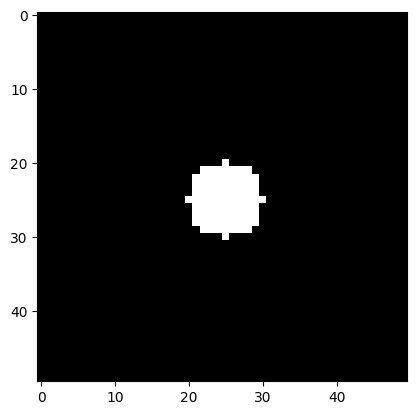

100%|██████████| 12/12 [00:00<00:00, 49.81it/s]


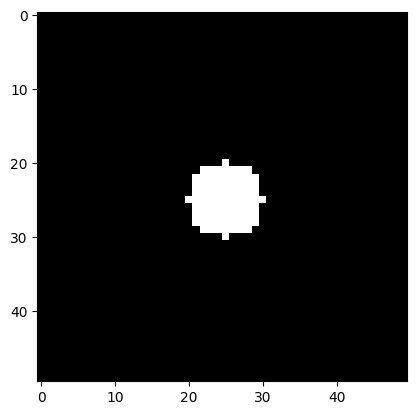

100%|██████████| 12/12 [00:00<00:00, 49.38it/s]


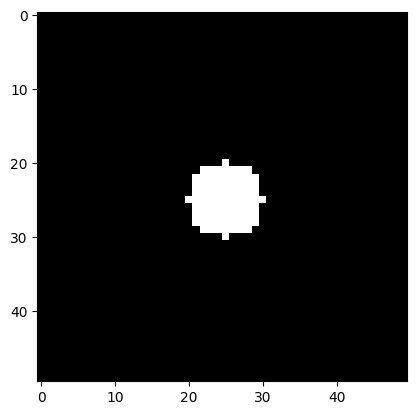

100%|██████████| 12/12 [00:00<00:00, 49.79it/s]


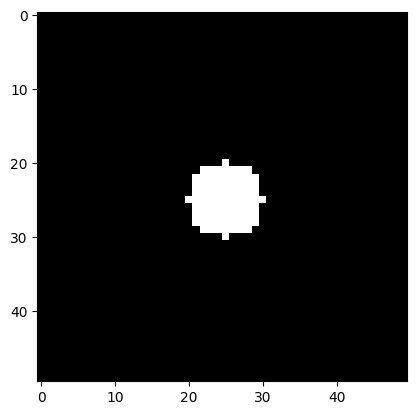

100%|██████████| 12/12 [00:00<00:00, 49.45it/s]


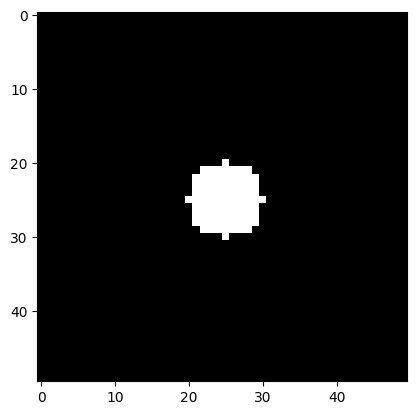

100%|██████████| 12/12 [00:00<00:00, 50.08it/s]


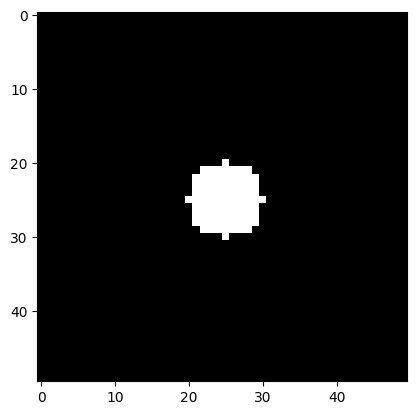

100%|██████████| 12/12 [00:00<00:00, 49.52it/s]


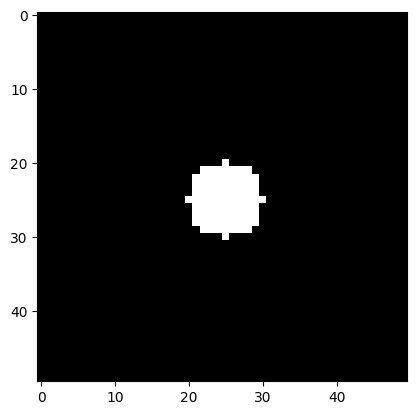

100%|██████████| 12/12 [00:00<00:00, 48.34it/s]


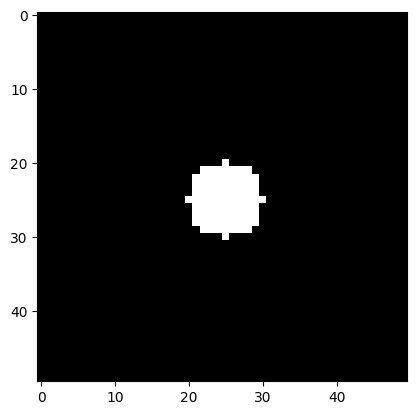

100%|██████████| 12/12 [00:00<00:00, 48.61it/s]


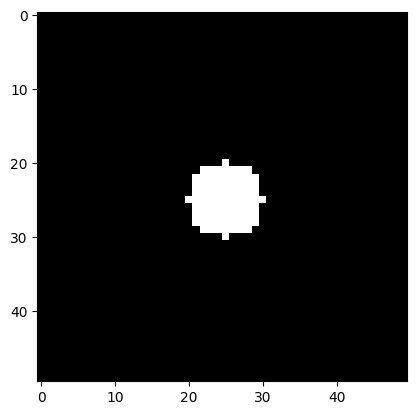

100%|██████████| 12/12 [00:00<00:00, 48.94it/s]


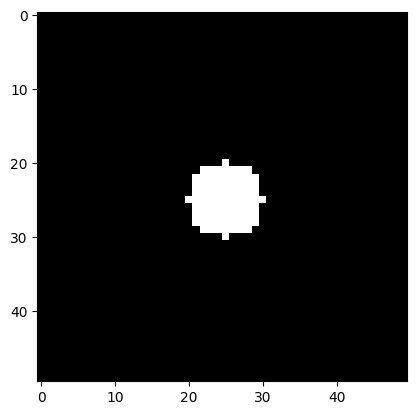

100%|██████████| 12/12 [00:00<00:00, 51.84it/s]


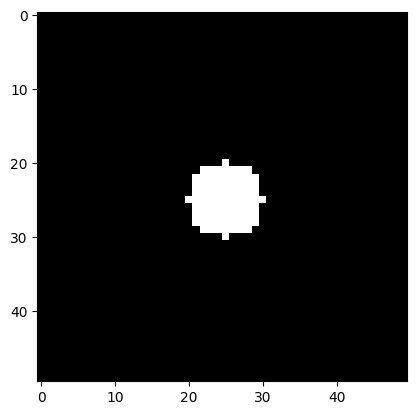

100%|██████████| 12/12 [00:00<00:00, 49.87it/s]


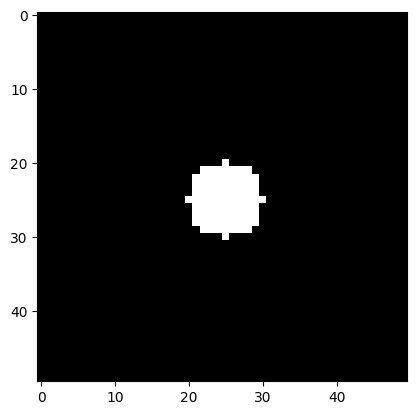

100%|██████████| 12/12 [00:00<00:00, 48.70it/s]


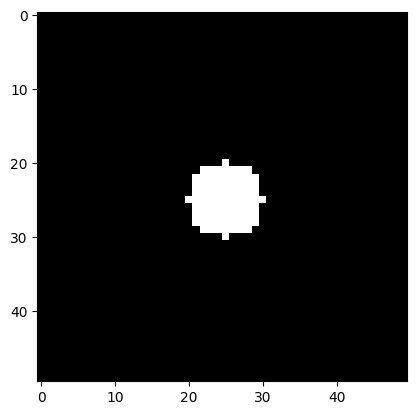

100%|██████████| 12/12 [00:00<00:00, 49.81it/s]


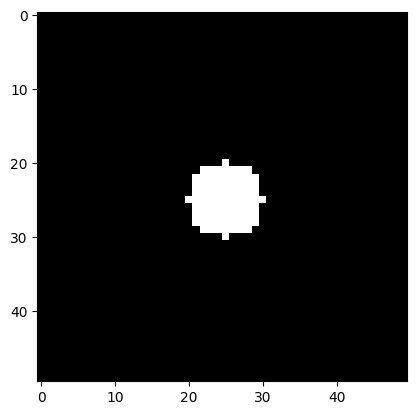

100%|██████████| 12/12 [00:00<00:00, 49.34it/s]


In [59]:
# Array to save data
temp_array = [] # Array to save the temperature decay
frames_array = [] # array to save images of the grid
fluence_array = [0.2,0.4,0.6,0.8,1,2,3,4,5,6,7,8,9,10] # 0.2 micrometer for dx
frames_name = ["0.2","0.4","0.6","0.8","1","2","3","4","5","6","7","8","9","10"]
gif_name = ["0.2","0.4","0.6","0.8","1","2","3","4","5","6","7","8","9","10"]
temperature_label_values = []


###.........Heat simulation diameter scan.........###
# Data
resolution = 50
startingTemperature = 103.15 # Round about -170C°
gamma = 0.245
timeStep = 7.8*10**(-4) 
boundaryTemp = 103.15
B_i = 0.126
number_of_steps = 12

#Add heat
center= (25, 25)
radius_of_interest = 5

for i in range(len(fluence_array)):

    # the variable input fluence
    value_to_add = calculate_Temperature(fluence_array[i])
    temperature_label_values.append(str(np.round(value_to_add,1)) + r'$\,$K')
    
    x1 = np.full(resolution, startingTemperature)
    y1 = np.full(resolution, startingTemperature)

    x2 = np.full(resolution, gamma)
    y2 = np.full(resolution, gamma)

    gridX, gridY = np.meshgrid(x1,y1)
    gridX2, gridY2 = np.meshgrid(x2,y2)

    fullGridX = np.dstack([gridX,gridX2])
    fullGridY = np.dstack([gridY,gridY2])

    # create meshgrid coordinates
    x = np.arange(resolution)
    y = np.arange(resolution)
    # create meshgrid for the x,y coordinates
    X, Y = np.meshgrid(x, y)
    # Berechne den Abstand jedes Gitterpunkts zum Mittelpunkt
    distances = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    # Überprüfe, ob der Abstand kleiner oder gleich dem Radius ist
    mask = distances <= radius_of_interest
    # Aktualisiere die Werte im Gitter entsprechend der Maske
    fullGridX[:,:,0][mask] += value_to_add

    # Plot the created mask
    white_image = Image.new('L', (50, 50), 255)
    white_image = white_image * mask
    plt.imshow(white_image,cmap='gray')
    plt.show()
    
    #Run simulation
    frames = [fullGridX[:,:,0].copy()]
    temp = [calculateAverageTemperatureWithinCircle(fullGridX, center, radius_of_interest)]

    for t in tqdm(range(0,number_of_steps)):

        frames.append(fullGridX[:,:,0].copy())
        fullGridX = heatTransfer(fullGridX.copy(),boundaryTemp, B_i)

        # Calculate the average temperature within the circle and append to the list
        average_temp_in_circle = calculateAverageTemperatureWithinCircle(fullGridX, center, radius_of_interest)
        temp.append(average_temp_in_circle)
        
    frames_array.append(frames)
    temp_array.append(temp)

# Calculate the time_steps
specific_point = timeStep*number_of_steps
step_size = timeStep
time_step_array =  np.arange(0, specific_point + step_size, step_size)
time_step_array = [element * 100 for element in time_step_array] # times 100 to transform it into nano seconds (10^-9 *100 = 10^-7)

# Save simulated data
np.save('fluence_heating_array.npy', temp_array)
np.save('fluence_heating_frames.npy', frames_array)
np.save('fluence_time_steps.npy', time_step_array)

In [62]:
#Make Gif, saves as "simulation.gif"
frames_name = ["0.2","0.4","0.6","0.8","1","2","3","4","5","6","7","8","9","10"]
gif_name = ["0.2","0.4","0.6","0.8","1","2","3","4","5","6","7","8","9","10"]
time_step_array = np.load("fluence_time_steps.npy")
frames_array = np.load("fluence_heating_frames.npy")

for i in range(len(frames_array)):
    makeGif(frames_array[i], gif_name[i], time_step_array, 103.15,500, frames_name[i])

100%|██████████| 13/13 [00:00<00:00, 22.03it/s]


In [81]:
temp_array = np.load("fluence_heating_array.npy")
print(len(temp_array[13]))
print(len(time_step_array))

13
13


C:\Users\l.dacamarasilva01\AppData\Local\Temp\8\ipykernel_1894764\2816691710.py:61: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


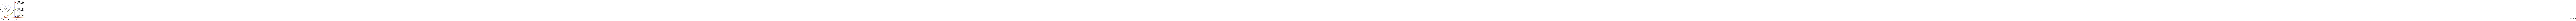

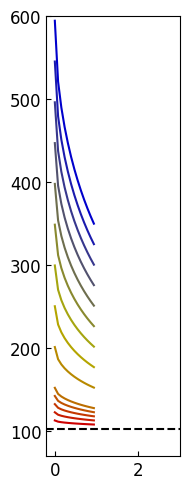

In [87]:
###.............................Plot the data.............................###

# Define the colors for the colormap: shade of blue (0, 0, 0.8), shade of yellow (0.7, 0.7, 0), shade of red (0.8, 0, 0)
colors = [(0.8, 0, 0), (0.7, 0.7, 0), (0, 0, 0.8)]

# Number of colors in the colormap
n_colors = 14

# Create the colormap
blue_yellow_red_cmap = LinearSegmentedColormap.from_list("red_blue_yellow", colors, N=n_colors)

# Create an array of colors from red to blue via purple
color_array = blue_yellow_red_cmap(np.linspace(0, 1, n_colors))

# Load the data
time_step_array = np.load("fluence_time_steps.npy")
temp_array = np.load("fluence_heating_array.npy")

frames_name = ["0.2","0.4","0.6","0.8","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","9.0","10"]
fluence_array = [0.2,0.4,0.6,0.8,1,2,3,4,5,6,7,8,9,10]
temperature_label_values = []

for i in range(len(fluence_array)):
    
    # the variable input fluence
    value_to_add = calculate_Temperature(fluence_array[i])
    temperature_label_values.append(str(np.round(value_to_add,1)) + r'$\,$K')

label_arr = temperature_label_values

#Plot the Result
plt.figure(figsize=(7,6))
plt.minorticks_on
plt.xlabel(r'Time in ns', fontsize="12")
plt.ylabel(r"Temperature in K", fontsize="12")
plt.tick_params(axis='both', which='major', direction='in')
plt.tick_params(axis='both', which='minor', direction='in')

# Diameter
#label_arr = [r'$0.2 \, mJ/cm^2 $', r'$0.4 \, mJ/cm^2 $', r'$0.6 \,mJ/cm^2 $', r'$0.8 \,mJ/cm^2 $', r'$1.0 \,mJ/cm^2 $', r'$2 \,mJ/cm^2 $', r'$3 \, mJ/cm^2 $', r'$4 \, mJ/cm^2 $', r'$5 \, mJ/cm^2 $', r'$6 \,mJ/cm^2 $',  r'$7 \, mJ/cm^2 $', r'$8 \, mJ/cm^2 $', r'$9 \, mJ/cm^2 $', r'$10 \, mJ/cm^2 $']
label_arr = temperature_label_values

for i in range(len(temp_array)):
    plt.plot(time_step_array, temp_array[i], color= color_array[i], label = f"{frames_name[i]} mJ/cm^2 / {label_arr[i]}")
    plt.legend(loc="upper right")

# Show line where the CDW Spots arge gone
plt.axhline(y=103.15, color='black', linestyle='--')
plt.text(120, 80, 'initial temperature', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=12)
plt.ylim(70, 600)

#Set the ricks direction inwards
plt.tick_params(axis='both', which='major', direction='in')
plt.tick_params(axis='both', which='minor', direction='in')

plt.tick_params(axis='both', labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best', fontsize = 12)
plt.tight_layout()
#plt.savefig("Fluence_scan.pdf")
plt.show()

#Plot the Result
plt.figure(figsize=(2,5))
plt.minorticks_on
plt.tick_params(axis='both', which='major', direction='in')
plt.tick_params(axis='both', which='minor', direction='in')
#plt.xlabel(r'Time in x100 ns', fontsize="14")
#plt.ylabel(r"Temperature in K", fontsize="14")


for i in range(len(temp_array)):
    plt.plot(time_step_array, temp_array[i], color= color_array[i])

# Show line where the CDW Spots arge gone
plt.axhline(y=103.15, color='black', linestyle='--')

plt.ylim(70, 600)
plt.xlim(-0.2,3)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("Fluence_scan_zoom.pdf")
plt.show()
